In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
# 데이터를 불러옵니다
with open("cleaned_data.pk", "rb") as f:
    data = pickle.load(f)

# 데이터 수정.
data.reset_index(inplace=True, drop=True)

# 데이터 확인.
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      980 non-null    object
 1   Speaker   980 non-null    object
 2   timetype  980 non-null    object
 3   time      980 non-null    object
 4   contents  980 non-null    object
dtypes: object(5)
memory usage: 38.4+ KB
None
         Date   Speaker timetype   time contents
0  2021-06-14  김태환 형 17       오전   6:01      고민중
1  2021-06-14    이현직 16       오전   8:00      셤잘쳐
2  2021-06-14  김태환 형 17       오전   8:00      귀여워
3  2021-06-14  김태환 형 17       오전  10:07       시발
4  2021-06-14  김태환 형 17       오전  10:08   담배가 쓰다


In [3]:
# 사용자를 파악합니다.
speakers = set(data["Speaker"])
speakers

{'김동현', '김락원 형 15', '김태환 형 17', '김표선 형 16', '이현직 16', '허정훈이 형 15'}

In [4]:
# 사용자별로 데이터를 묶습니다.
authors = data.groupby("Speaker")
pprint(authors.groups)
print(type(authors.groups))

{'김동현': Int64Index([102, 104, 135, 136, 148, 150, 152, 205, 206, 211, 212, 216, 239,
            401, 402, 405, 406, 427, 431, 468, 470, 475, 476, 477, 482, 487,
            488, 489, 492, 495, 498, 548, 584, 585, 586, 668, 669, 693, 701,
            934, 960, 964, 973, 974],
           dtype='int64'),
 '김락원 형 15': Int64Index([  9,  28,  30,  33,  36,  46,  47, 100, 223, 225, 237, 380, 385,
            389, 390, 398, 421, 424, 454, 465, 478, 505, 506, 536, 600, 603,
            677, 684, 708, 712, 776, 779, 780, 785, 790, 792, 815, 818, 821,
            825, 828, 830, 835, 840, 855, 858, 860, 890, 904, 918, 924, 927,
            931, 935, 937, 941, 944, 947, 954, 957],
           dtype='int64'),
 '김태환 형 17': Int64Index([  0,   2,   3,   4,   6,   7,   8,  18,  26,  27,
            ...
            963, 965, 966, 967, 968, 969, 970, 975, 976, 977],
           dtype='int64', length=317),
 '김표선 형 16': Int64Index([ 12,  13,  20,  21,  22,  37,  43,  44,  45,  49,
            ...
           

In [5]:
# 사용자별로 묶은 데이터를 사용가능한 데이터 타입으로 바꿉니다.
author2doc = {}
for speaker, index in authors.groups.items():
    author2doc[speaker] = list(index)

author2doc

{'김동현': [102,
  104,
  135,
  136,
  148,
  150,
  152,
  205,
  206,
  211,
  212,
  216,
  239,
  401,
  402,
  405,
  406,
  427,
  431,
  468,
  470,
  475,
  476,
  477,
  482,
  487,
  488,
  489,
  492,
  495,
  498,
  548,
  584,
  585,
  586,
  668,
  669,
  693,
  701,
  934,
  960,
  964,
  973,
  974],
 '김락원 형 15': [9,
  28,
  30,
  33,
  36,
  46,
  47,
  100,
  223,
  225,
  237,
  380,
  385,
  389,
  390,
  398,
  421,
  424,
  454,
  465,
  478,
  505,
  506,
  536,
  600,
  603,
  677,
  684,
  708,
  712,
  776,
  779,
  780,
  785,
  790,
  792,
  815,
  818,
  821,
  825,
  828,
  830,
  835,
  840,
  855,
  858,
  860,
  890,
  904,
  918,
  924,
  927,
  931,
  935,
  937,
  941,
  944,
  947,
  954,
  957],
 '김태환 형 17': [0,
  2,
  3,
  4,
  6,
  7,
  8,
  18,
  26,
  27,
  29,
  31,
  32,
  34,
  35,
  38,
  40,
  42,
  48,
  50,
  51,
  53,
  57,
  61,
  62,
  63,
  65,
  66,
  67,
  68,
  69,
  70,
  81,
  82,
  85,
  87,
  88,
  89,
  90,
  93,
  97,
  99,
  

In [6]:
# 첫번째 유저에 대한 카카오톡 내용 확인.
user1_msg = [str(data["contents"][idx]) for idx in author2doc["김동현"]]
user1_msg

['교수님이 잘못 매기신듯',
 '족보 한참 남았다',
 '진짜 맨날 자기는 잘못없고',
 '옆에 사람 때문이라함',
 '샵검색  간신',
 '태환이형',
 '여기 출연했다매',
 '친구 포항 풀빌라애서 일하는데',
 '할인해달라고 해줄 수 있는데',
 '마치블루',
 '여기 좀 유명인들 많이 온다',
 '좋은방아니가',
 '표햄 작년에 벡해 족보 푼거 있나',
 '종강',
 '수학과 졸업이다 이제',
 '고맙다',
 '멸치',
 '편미방 성적 개빨리뜨네',
 '현직이 살빠졌네',
 '아 새도 개가기싫네',
 '짐들고 올걸',
 '다시 새도 갈라고',
 '짐두고 왔는데',
 '비가 안그치네',
 '이게 진짜 기만이지',
 '30프로까지 에이인데 되긋니',
 '되긋지',
 '태환이형 담타',
 '아 그럼 30분에 새도 갈게',
 '비안오면 갈게',
 '지금 출발할게',
 '빨끝내라',
 '형',
 '나도 먼저갈게',
 '못 버티겠다',
 '이번에 나온 갤탭은 괜찮다고 들었어요',
 '그래도 아이패드져',
 '태환이 형 잘있어',
 '밖에 비온디',
 '벡해 비쁠',
 '태환이형 근무 수욜 14시 같이 ',
 '개띄꺼운데',
 '게임이탈여부 예측 알고리즘',
 '이런건 있음']

#### 빈도 분석 (예전과 코드가 거의 같음)

In [7]:
# 전체 단어 분석을 위해 token들을 전부 모으기
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

111


In [8]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

100
[('태환이형', 3),
 ('새도', 3),
 ('족보', 2),
 ('진짜', 2),
 ('여기', 2),
 ('벡해', 2),
 ('아', 2),
 ('갈게', 2),
 ('형', 2),
 ('교수님이', 1)]


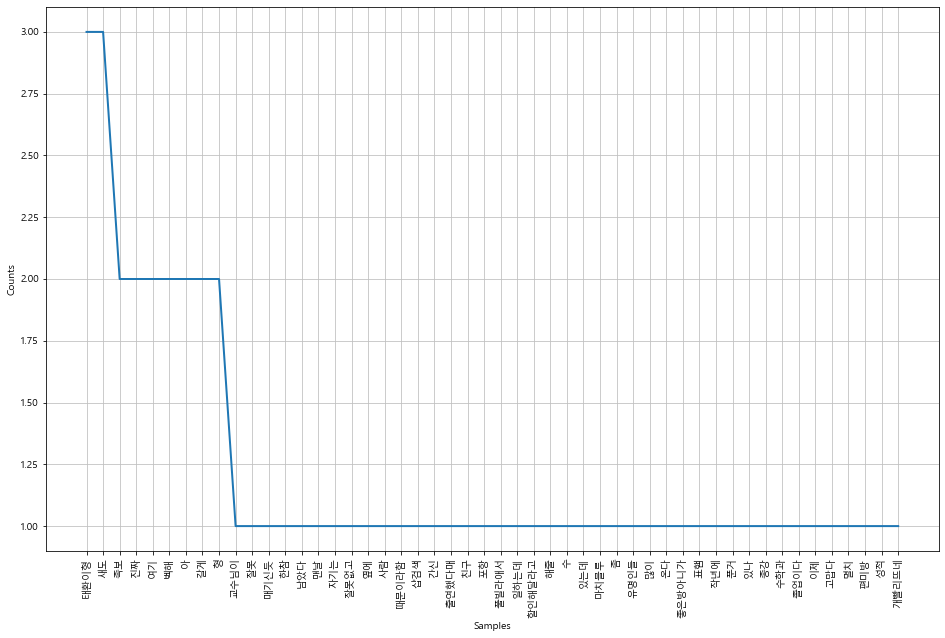

In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

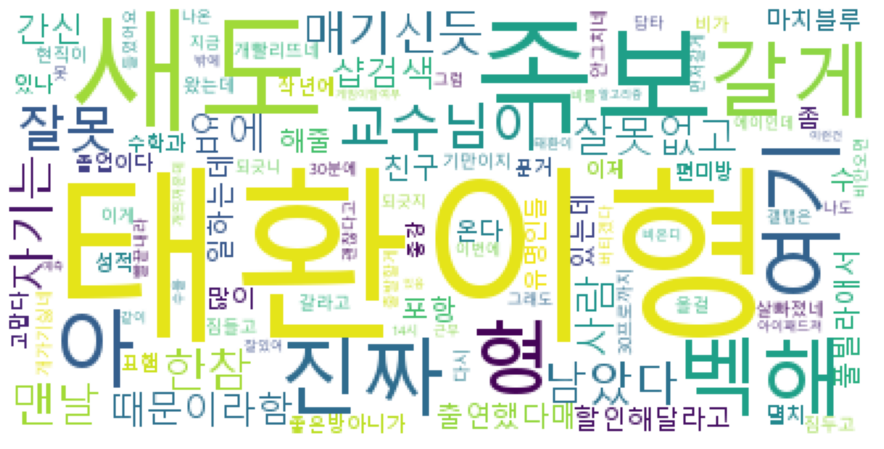

In [10]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 빈도 분석 내용을 하나의 함수로 합치기

In [11]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["contents"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

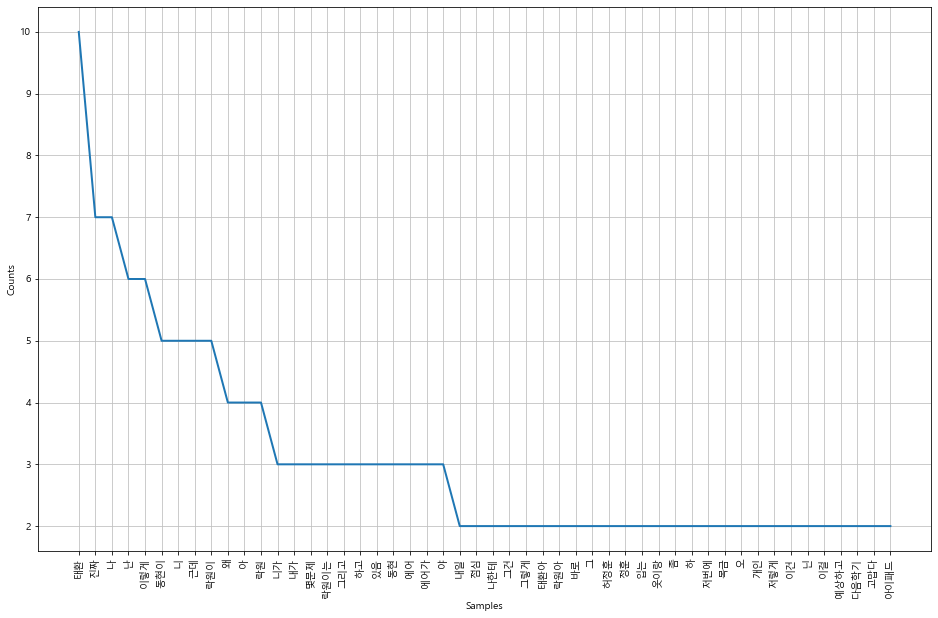

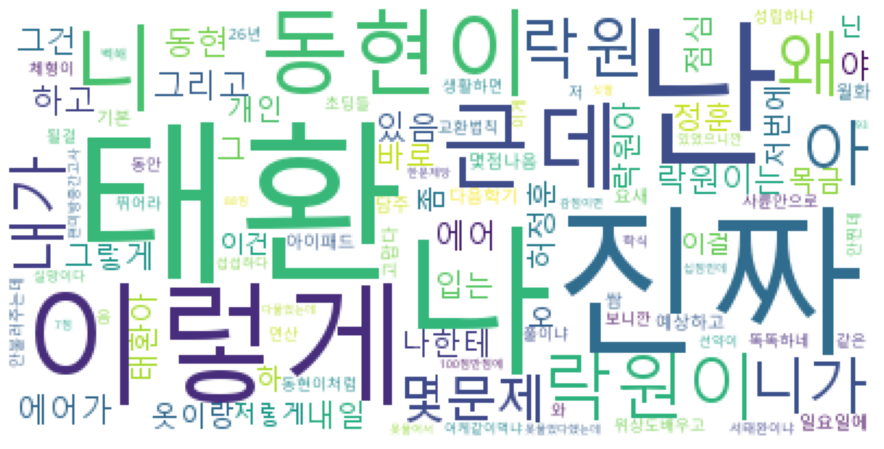

In [12]:
# 함수 테스트
user_freq_analysis("김표선 형 16", data, author2doc)